In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_predict, train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
# Load dataset
data = pd.read_csv('../data/ENB2012_data_with_columns.csv')

# Check for NaN values and replace or drop them
data = data.replace([np.inf, -np.inf], np.nan)
data = data.dropna()

In [3]:
# Define input and output variables
X = data.iloc[:, :-2]
y_hl = data['Heating_Load']
y_cl = data['Cooling_Load']

In [4]:
# Split the data into training and testing sets
X_train_hl, X_test_hl, y_train_hl, y_test_hl = train_test_split(X, y_hl, test_size=0.2, random_state=42)
X_train_cl, X_test_cl, y_train_cl, y_test_cl = train_test_split(X, y_cl, test_size=0.2, random_state=42)

In [5]:
# Define the models with the best parameters
best_params_hl = {'colsample_bytree': 0.9, 'gamma': 0, 'learning_rate': 0.2, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 300, 'reg_alpha': 0, 'reg_lambda': 1, 'subsample': 1}
best_params_cl = {'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.2, 'max_depth': 5, 'min_child_weight': 2, 'n_estimators': 300, 'reg_alpha': 0, 'reg_lambda': 1, 'subsample': 0.8}

In [6]:
xgb_model_hl = XGBRegressor(**best_params_hl)
xgb_model_cl = XGBRegressor(**best_params_cl)

In [7]:
# Train the models
xgb_model_hl.fit(X_train_hl, y_train_hl)
xgb_model_cl.fit(X_train_cl, y_train_cl)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.2, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=2, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [8]:
# Make predictions
y_pred_train_hl = xgb_model_hl.predict(X_train_hl)
y_pred_test_hl = xgb_model_hl.predict(X_test_hl)
y_pred_train_cl = xgb_model_cl.predict(X_train_cl)
y_pred_test_cl = xgb_model_cl.predict(X_test_cl)

In [9]:
# Evaluate performance
def evaluate_performance(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2

In [10]:
mae_train_hl, rmse_train_hl, r2_train_hl = evaluate_performance(y_train_hl, y_pred_train_hl)
mae_test_hl, rmse_test_hl, r2_test_hl = evaluate_performance(y_test_hl, y_pred_test_hl)
mae_train_cl, rmse_train_cl, r2_train_cl = evaluate_performance(y_train_cl, y_pred_train_cl)
mae_test_cl, rmse_test_cl, r2_test_cl = evaluate_performance(y_test_cl, y_pred_test_cl)

In [11]:
print(f'Heating Load - Train MAE: {mae_train_hl}, RMSE: {rmse_train_hl}, R2: {r2_train_hl}')
print(f'Heating Load - Test MAE: {mae_test_hl}, RMSE: {rmse_test_hl}, R2: {r2_test_hl}')
print(f'Cooling Load - Train MAE: {mae_train_cl}, RMSE: {rmse_train_cl}, R2: {r2_train_cl}')
print(f'Cooling Load - Test MAE: {mae_test_cl}, RMSE: {rmse_test_cl}, R2: {r2_test_cl}')

Heating Load - Train MAE: 0.050212579286059725, RMSE: 0.07210861513773674, R2: 0.9999484794806421
Heating Load - Test MAE: 0.25389049369019345, RMSE: 0.40061560854569866, R2: 0.9984602275780509
Cooling Load - Train MAE: 0.10618690409955453, RMSE: 0.15554462646041767, R2: 0.9997301540178394
Cooling Load - Test MAE: 0.4846490505763462, RMSE: 0.8002508657302101, R2: 0.9930884896870983


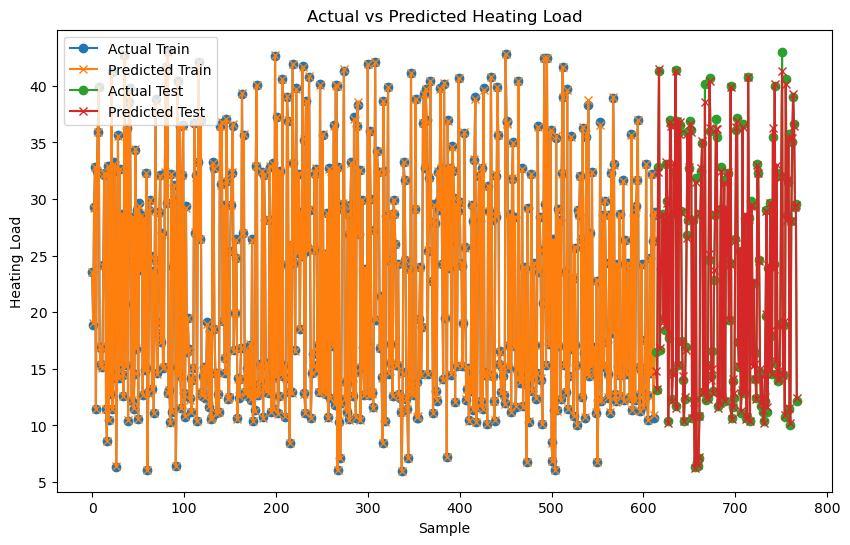

In [12]:
# Plot actual vs predicted values for heating load
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_train_hl)), y_train_hl, label='Actual Train', linestyle='-', marker='o')
plt.plot(range(len(y_train_hl)), y_pred_train_hl, label='Predicted Train', linestyle='-', marker='x')
plt.plot(range(len(y_train_hl), len(y_train_hl) + len(y_test_hl)), y_test_hl, label='Actual Test', linestyle='-', marker='o')
plt.plot(range(len(y_train_hl), len(y_train_hl) + len(y_test_hl)), y_pred_test_hl, label='Predicted Test', linestyle='-', marker='x')
plt.title('Actual vs Predicted Heating Load')
plt.xlabel('Sample')
plt.ylabel('Heating Load')
plt.legend()
plt.savefig('../results/figures/actual_vs_predicted_heating_load.png')
plt.show()

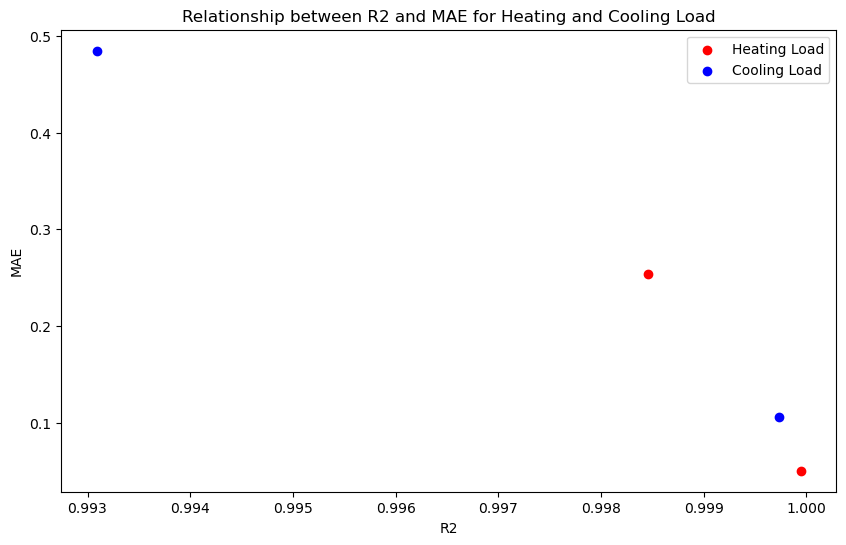

In [13]:
# Scatter plot for R2 vs MAE
plt.figure(figsize=(10, 6))
plt.scatter([r2_train_hl, r2_test_hl], [mae_train_hl, mae_test_hl], label='Heating Load', c='r')
plt.scatter([r2_train_cl, r2_test_cl], [mae_train_cl, mae_test_cl], label='Cooling Load', c='b')
plt.title('Relationship between R2 and MAE for Heating and Cooling Load')
plt.xlabel('R2')
plt.ylabel('MAE')
plt.legend()
plt.savefig('../results/figures/r2_vs_mae_hl_cl.png')
plt.show()